In [1]:
import warnings
warnings.filterwarnings('ignore')

통계 모델링과 머신 러닝 모델링은 방식은 서로 다르지만 해결하려는 과제는 같다. 

# 선형회귀모형
 - 통계 모델링
  - 선형회귀 모델은 초평면과 관측값 사이의 오차를 최소화하는 방법으로, 정규 방정식을 이용하여 최적 hyperplane을 fitting한다. 
  - 통계 모델은 신뢰성 검증을 위해 다중공선성(multi-collinearity) 검사를 해야 한다.
  - 훈련 집합에 관해 이중 검증, 즉 <U>모델의 정확도 테스트</U>와 <U>개별 매개변수의 유의성 테스트</U>를 모두 수행한다. 
  - 선형 회귀나 로지스틱 회귀는 모델 자체의 형태상 낮은 분산을 가지므로 처음 보는(unseen) 데이터에 관해 성능 차이가 크게 달라질 확률은 아주 낮다.
 - 머신 러닝 모델링
  - 같은 문제를 최적화 문제로 변환한다. 즉, 잔차의 제곱합을 목적함수(모수의 함수 형태)로 모델링을 한 후 모수에 관한 최적화를 통하여 잔차를 최소화 한다. 
  - 다중공선선 문제를 보상하기 위해 모수에 대한 값을 스스로 조정한다. 특히 Bagging, Random forest, Boosting과 같은 트리 기반의 ensemble 모델은 다중공선성 문제가 존재하지도 않는다.
  - 모델이 고도의 유연성을 가지므로 아주 심한 변화가 가능하며, 개별 변수 단위의 통계 진단은 머신 러닝에서 수행할 수 없다.
  - Overfitting을 피하기 위한 안정성이 보장돼야 구현 단계에서도 처음 보는 데이터에 관해 올바르게 작동하리라는 것을 보장 할 수 있다. Overfitting을 피하기 위해 모델을 정규화(generalization) 한다. 
  - 데이터를 훈련/검증/테스트 세트로 나눈 후, 훈련 데이터를 이용하여 모델을 개발하고, hyperparameter는 검증 데이터를 사용해 튜닝한다. 이것은 통계 모델에서의 이중 검증과 같은 효과를 내며 개별 변수 단위의 진단을 수행하지 않고도 모델의 안정성을 보장할 수 있게 해준다.

# Error와 Residual

- 오차(error)
 - 모집단에서의 실제값과 모집단에서의 회귀선을 비교했을 때 나타나는 차이. 즉 모집단에서 생기는 것이다.
 - 모집단의 회귀선 : $y_i=\beta_0 + \beta_1 x_i$


- 잔차(residual)
 - 표본에서 나온 관측값과 표본에서 나온 회귀선을 비교했을 때 나타나는 차이. 즉 표본에서 생기는 것이다.
 - 회귀모형에서 오차항은 측정할 수 없으므로 **잔차를 오차항의 관찰값으로 해석하여 오차항에 대한 가정들의 성립 여부를 조사한다.**
 - 표본에서의 회귀선 : $\hat{y}_i=\hat{\beta}_0 + \hat{\beta}_1 x_i$
 - 잔차 : <font color=red>$e_i=y_i-\hat{y}_i$</font>



모집단의 회귀식은 우리가 궁극적으로 알고자 하는 실제의 식인 것이다. 모든 data들을 하나의 회귀식으로 100% 설명할 수 없다. 그래서 생각해 낸 것이 바로 오차(error) 라고 하는 것으로, 이 값은 모집단 회귀식의 값과 실제값과의 차이를 말한다. 이에 비해서 잔차(residual)라고 하는 것은 표본의 회귀식에서 나온 값이다. 표본에서도 마찬가지로 회귀식을 구할 수 있다. 그러나, 그 회귀식은 모집단의 실제 회귀식과는 차이가 있을 수 있다. 이 때에 모집단의 회귀식과 마찬가지로 표본의 회귀식에서도 잔차라는 것을 생각할 수 있으며, 같은 아이디어에 의해 구해지게 된다. 
그러나, 오차는 모수의 개념이므로 표본에서는 오차라는 용어대신 통계량의 개념을 갖는 잔차(residual)라는 용어로 대신 부르게 된다. 결국, 오차와 잔차는 같은 개념이지만 모집단의 값인가, 표본의 값인가에 따라 서로 달리 부르게 되는 것이다.

# 선형 회귀의 가정
 - 종속 변수는 독립 변수의 선형 조합이어야 한다.
  - $y=\beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2^2$에서 $x^2$은 이차항이지만, 변수간의 선형 조합이라는 가정을 충족시킨다.
 - Error terms(오차항)에 autocorrelation(자기상관관계)가 없어야 한다.
  - **자기상관관계** : 선형회귀분석에서 종속변수가 시간 또는 위치에 영향을 받는 시계열데이터인 경우 이웃하는 관찰값들 사이에 상관관계가 있을 수 있다. 이러한 상관을 자기상관(autocorrelation)이라고 하며, 자기상관은 한 시점의 오차항과 과거시점들의 오차항들과의 상관이다. 따라서 이러한 데이터 set에서는 오차항들이 서로 독립적이라는 조건을 검토해보아야 한다.
  - 오차항의 상관관계는 모델의 정확성을 훼손시킨다.
  - 진단 방법 : 더빈 왓슨 검정(Durbin-Watson test)을 사용한다. 더빈 왓슨의 $d$ 검정은 '잔차에는 선형 자기 상관관계가 없다'라는 귀무가설을 검정한다. $d$는 0과 4중 어느 값을 갖는데, $d$가 2에 가까우면 자기 상관관계가 없다는 것을 의미하고, $0<d<2$일 경우 양의 자기 상관관계, $2<d<4$인 경우 음의 자기상관관계를 나타낸다.
 - <font color=red>오차는 평균이 0이면서 정규분포를 따라야 한다.</font>
  - 모델이 편향되지 않을 수 있게 계산을 하려면 오차항의 평균이 0이어야 한다. 오차의 분포를 Q-Q그림을 이용하여 살펴볼 수 있다. 오차 항이 정규분포를 따르지 않으면 오차 항에 대한 신뢰 구간이 너무 넓어지거나 좁아지므로 최소 자승법에 의한 최소화 계수 계산이 어려워진다. 
  - 진단 방법 : Q-Q 도표와 Kolmogorov-Smirnov(콜모고로프-스미노프) 검정을 사용한다.
 - Multi-collinearity(다중공선성)은 존재하지 않거나 거의 없어야 한다.
  - **다중공선성** 은 독립 변수끼리 서로 상관관계를 가지는 것을 의미한다. 다중공선성은 계수나 계산값을 부풀리므로 모델의 신뢰도를 떨어뜨린다. 또 결과값에 어느 변수가 얼마나 기여했는지 판단하기 힘들다. 전체 독립 변수에 관한 개별 독립 변수의 $R^2$를 계산하는 방식으로 각 독립 변수의 **Variance Inflation Factor(VIF)** 를 계산하고 가장 높은 VIF 값을 가진 변수를 하나씩 제거해 나가야 한다. $$VIF=\frac{1}{1-R^2}$$
  - 진단 방법 : VIF를 직접 계산한다. $VIF \leq 4$이면 다중공선성이 없다는 것을 의미하는데, 은행의 경우 $VIF \leq 2$를 사용하기도 한다.
 - Error terms는 개별 독립 변수들에 대하여 homoscedastic(등분산성)을 가져야 한다.
  - 오차는 독립 변수들에 관해 일정한 분산값을 가져야 한다. 그렇지 않으면 비현실적으로 넓거나 좁은 신뢰 구간이 형성되고 모델의 성능을 떨어뜨리게 된다. 
  - 등분산성을 깨뜨리는 원인 중 하나는 데이터의 이상값으로(abnormal value or outlier) 자기 쪽으로 모델의 parameter 값이 높은 가중치를 갖도록 모델이 학습될 때 영향을 끼친다.
  - 진단 방법 : 잔차와 독립 변수의 산포도를 살펴본다. 큰 모양이나 발산이 존재하면 오차가 일정한 분산을 갖지 않는다는 것을 의미하고 예측에 영향을 미치게 된다.

---
# 선형 회귀 모델링 단계 (통계적 모델링)
 1. 결측값(missing value), 이상값(outlier)를 처리한다.
 2. 독립 변수 간의 상관 관계를 확인한다.
 3. 훈련 데이터와 테스트 데이터를 나눈다.
 4. 훈련 데이터를 이용하여 모델을 fitting
 5. 테스트 데이터를 사용해 모델을 평가
---

# 선형 회귀 모형 개별 독립 변수에 대한 유의성 검정

관찰값
$(x_1, y_1), (x_2, y_2), (x_3, y_3),...,(x_n, y_n)$ 에 대하여,

- 찾고자 하는 모집단의 회귀선 : $y=\beta_0 + \beta_1x_i$
- 추정한 회귀선 : $\hat{y}=\hat{\beta}_0 + \hat{\beta}_1x_i$
- 표본에서의 residual : $e_i=y_i-\hat{y}_i=y_i-\hat{\beta_0}-\hat{\beta_1}x_i$
- $RSS=\sum_{i=1}^{n}e_i^2=\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_i)^2$
- $\hat{\beta_1}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}=\frac{cov(x,y)}{var(x)}$
- $\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$ , where $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$, $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$

선형 회귀의 결과가 통계학적으로 유의미하다는 것을 증명하기 위해 가설 검정을 수행한다. 여기서는 단순 선형 회귀를 살펴보지만, 다중 회귀 분석에도 적용된다.
- $H_0$ : $x$와 $y$사이에는 상관관계가 없다. $\beta_1=0$
- $H_1$ : $x$와 $y$사이에는 상관관계가 있다. $\beta_1\neq0$

$\beta_1=0$이면 모델은 변수 간의 상관관계가 없다는 것을 보여주고, $y=\beta_0+\epsilon$ 가 된다. 이것은 곳 귀무 가설과 같다. 이 가정이 옳은지 그른지를 증명하기 위해서 $\beta_1$이 0으로부터 충분히 멀리 떨어져 있는지 판단(통계학적인 유의성을 나타내는 0으로부터의 거리를 의미한다.)해 $\beta_1$이 0이 아니라고 확신하면 두 변수 간에 유의미한 상관관계가 있다는 것을 알게 된다.

남은 문제는 0부터 **충분한**거리라는 것이 도대체 얼마를 의미하는지 판단하는 것이다. 이것은 $\beta_1$의 분포에 달려 있는데, 평균과 표준오차로 판단할 수 있다. 경우에 따라 표준 오차인 $SE(\beta_1)$이 작다면 상대적으로 아주 작은 값도 $\beta_1 \neq 0$라는 결론을 도출해서 $x$와 $y$간에 상관관계가 있다는 결론을 도출 할 수 있다. 반대로 $SE(\beta_1)$ 값이 크다면 $\beta_1$의 절대값이 충분히 클 때만 귀무가설을 기각할 수 있다.|

---
# $R^2$ 결정계수(Sample coefficient of determination)

표본의 총 변동을 설명하는 데 있어서 회귀선에 의하여 설명되는 변동이 기여하는 비율이다. 즉 회귀선의 기여율이다.

한 개의 관찰값 $y_i$와 $y_i$들의 평균 $\bar{y}$와의 차이를 총 편차(total deviation)라 하며 다음과 같이 표현된다. $y_i-\bar{y}=(y_i-\hat{y_i}) + (\hat{y_i} + \bar{y})$

$\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$

$\text{SST}=\sum_{i=1}^{n}(y_i-\bar{y})^2$ : Total sum of squares, Total variation (총 변동)

$\text{SSE}=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}e_i^2$ : Sum of squares due to residual error, 회귀선에 의해 설명 안 되는 변동

$\text{SSR}=\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2$ : Sum of squares due to regression, 회귀선에 의해서 설명 되는 변동

- <font color=red>결정계수</font> : 총변동 중에서 회귀선에 의하여 설명되는 비율 $0 \leq R^2 \leq 1$
$$R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}$$

$R^2 \geq 0.7$이면 모델은 처음 보는 데이터를 처리하기에 충분하다는 판단을 하고, 그 값이 0.7보다 작으면 모델을 실제로 배치하기에는 그리 좋지 않다는 결론을 내린다.

---

# 수정된 $R^2$ 결정계수(Sample coefficient of determination)

# *예제 : Wine quality*

In [2]:
import pandas as pd

## 1. 데이터 로딩

In [3]:
path = './inputs/winequality-data.csv'
dataset = pd.read_csv(path)
dataset.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [4]:
# Column 이름에 '.'이 포함된 것을 '_'로 변경 (개인 취향)
import re
column_names = [re.sub('\.', '_', col) for col in dataset.columns.values]
dataset.columns = column_names  # 컬럼 이름 변경
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [5]:
# 쓸모없는 column 삭제한다. 새로운 data frame을 생성하지 않고, 기존의 data frame 안에서 수행한다.
dataset.drop('id', axis=1, inplace=True)
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


## 2. Train, test set을 구성한다.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dataset['alcohol'], dataset['quality'], 
                                                    test_size = 0.3, random_state = 42)

In [8]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [9]:
# Train data의 shape 확인
print(x_train.shape)

(2742, 1)


In [10]:
x_train.head()

,alcohol
2053,10.7
1507,12.2
1293,10.6
2758,11.8
1839,10.4


In [11]:
y_train.head()

,quality
2053,5
1507,6
1293,6
2758,6
1839,6


## 3. 알코올 함량$(x)$과 품질 사이$(y)$에 상관관계가 있을까? (단순 선형 회귀)

회귀식에서, 계수를 구하는 공식은 다음과 같다.
- $\hat{\beta_1}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}=\frac{cov(x,y)}{var(x)}$
- $\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$ , where $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$, $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$

In [12]:
# 알코올의 평균을 구한다.
alcohol_train_mean = x_train.mean()
alcohol_train_mean = alcohol_train_mean.values[0]
alcohol_train_mean

10.524545344031122

In [13]:
# Quality의 평균을 구한다.
quality_train_mean = y_train.mean().values[0]
quality_train_mean

5.88001458789205

In [14]:
# 분산을 구한다.
alcohol_train_var = x_train.var().values[0]
alcohol_train_var

1.5324158112919055

In [15]:
quality_train_var = y_train.var().values[0]
quality_train_var

0.7900491789188193

In [16]:
# 공분산을 구한다.
alcohol_train_cov = pd.concat([x_train, y_train], axis=1).cov().values
print(alcohol_train_cov)

[[1.53241581 0.50055409]
 [0.50055409 0.79004918]]


In [17]:
cov_train = alcohol_train_cov[0][1]
cov_train

0.5005540866543494

In [18]:
b_1 = cov_train / alcohol_train_var
b_1

0.3266437757728149

In [19]:
b_0 = quality_train_mean - b_1 * alcohol_train_mean
b_0

2.4422373584255253

결정계수를 확인해보자.
$$R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}$$

In [20]:
y_pred = b_0 + b_1 * x_test
y_pred.columns = y_test.columns

In [21]:
r_sqrt = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [22]:
r_sqrt

quality    0.192343
dtype: float64

#### R 제곱값이 작기 때문에 품질과 알코올 함량 사이에는 강한 상관관계가 없다고 결론 내릴 수 있다.

## 4. 다중 선형 회귀

- `sklearn` : 최종 정확값을 알려준다.
- `statmodels.api` : 변수에 관한 진단을 함께 보여준다.

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.metrics import r2_score

### 4.1. Exploratory Data Analysis

In [25]:
# Column list를 살펴보고, EDA를 할 특성을 살펴보자.
dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- volatile acidity : 사전적 의미로 "휘발성산"의 뜻이며, 와인용어로 와인에게 있어서 휘발성 산은 사람의 체온과 비슷하여 현재의 상태를 알려준다. 적당한 양의 휘발성산은 와인 향에 필수적이지만, 너무 많으면 문제가 있다는 것을 알려주는 신호
- chlorides : 염화물
- sulphates : 황산염
- alcohol : 알코올

In [26]:
eda_columns = ['volatile_acidity', 'chlorides', 'sulphates', 'alcohol', 'quality']

In [27]:
sns.set(style='whitegrid', context='notebook')

시각적으로 독립변수와 종속변수의 상관관계를 살펴본다.

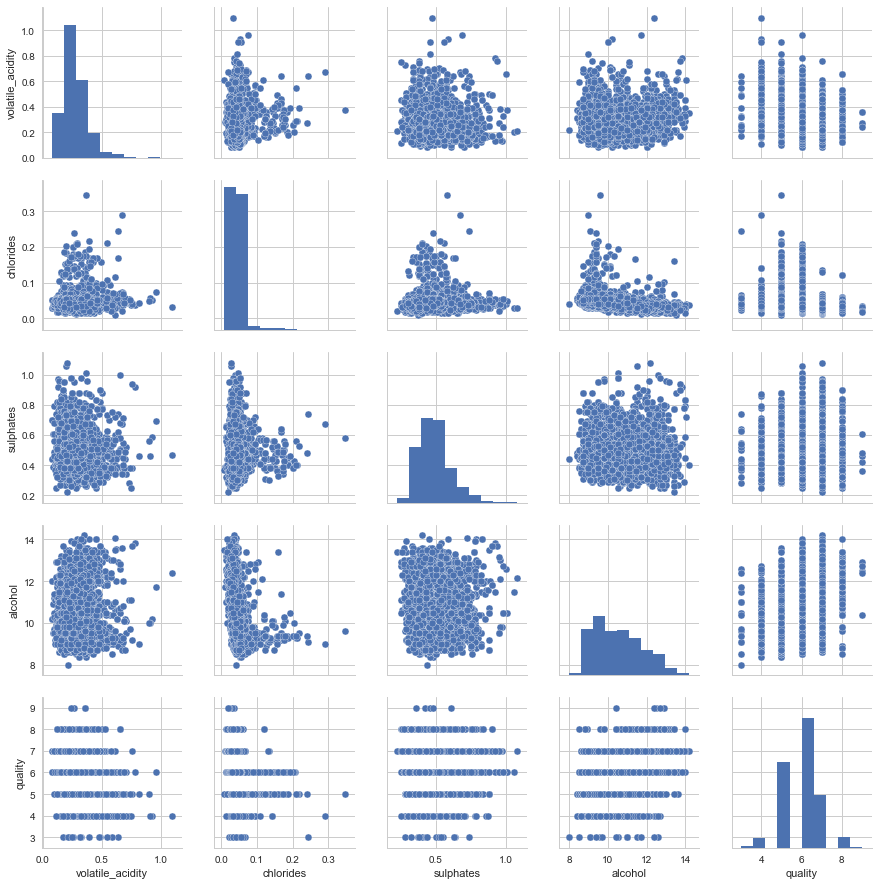

In [28]:
sns.pairplot(dataset[eda_columns], size=2.5, x_vars=eda_columns, y_vars=eda_columns)

수치적으로 상관관계를 살펴본다.

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

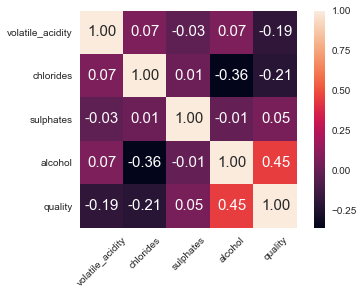

In [29]:
corr_mat = np.corrcoef(dataset[eda_columns].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
                       fmt='.2f', annot_kws={'size': 15},
                       yticklabels=eda_columns, xticklabels=eda_columns)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

### 4.2. 후진 제거법과 전진 선택법
최적 모델을 결정하기 위해 다양한 방법으로 변수를 추가하거나 제거한다.

- Backward method(후진 제거법) : 전체 변수를 대상으로 미리 정의한 모든 통계 수치(유의 수준, 다중공선성 등)를 만족할 때까지 반복적으로 변수를 하나씩 제거해 나간다. 최종적으로 전반적인 통계값을 검사해  결정계수($R^2$)가 0.7보다 크면 좋은 모델로 받아드리고, 그렇지 않으면 기각한다.
- 전진 선택법 : 변수 집합은 공집합에서 출발해서 전체 모델의 적합도가 좋아질 때 까지 변수를 계속 증가시켜간다.

주로 후진 제거법을 사용한다.

In [30]:
features = dataset.columns.drop('quality')
features

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [31]:
x = dataset[features]
x.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4


In [32]:
y = dataset['quality']
y.head(1)

0    6
Name: quality, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, train_size=0.7, random_state=42)

`add_constant`는 절편 변수를 생성하는 것이다. 절편을 만들지 않으면 그에 따라 계수도 바뀌게 된다.

In [34]:
x_train_new = sm.add_constant(x_train)
x_train_new.head(1)

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2053,1.0,6.8,0.32,0.43,1.6,0.05,4.0,65.0,0.99346,3.27,0.47,10.7


> 전체 feature를 사용했을 때의 모델 (첫 번째 iteration)

#### (1) 각 개별 변수의 통계적 유의성(p-value)를 살펴본다.

In [35]:
x_test_new = sm.add_constant(x_test)
x_test_new.head(1)

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
270,1.0,7.8,0.17,0.5,1.3,0.045,35.0,140.0,0.9904,3.16,0.4,12.0


In [36]:
lr_model = sm.OLS(y_train, x_train_new)
lr_model

In [37]:
fitted_lr = lr_model.fit()

In [38]:
# 모델의 Summary를 분석해보자.
fitted_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          3.02e-201
Time:                        08:40:24   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6184.
Df Residuals:                    2730   BIC:                             6255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.6311     22.199      6.020      0.000      90.103     177.159
fixed_acidity            0.0638      0.026      2.453      0.014       0.013       0.115
volatile_acidity        -1.8664      0.155    -12.037      0.000      -2.170      -1.562
citric_acid              0.0213      0.127      0.169      0.866      -0.227       0.270
residual_sugar           0.0823      0.009      8.894      0.000       0.064       0.100
chlorides               -0.8567      0.804     -1.066      0.286      -2.432       0.719
free_sulfur_dioxide      0.0033      0.001      3.033      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.266      0.790      -0.001       0.001
density               -133.8388     22.529     -5.941      0.000    -178.015     -89.663
pH                       0.6434      0.136      4.744      0.000       0.377       0.909
sulphates                0.4929      0.133      3.703      0.000       0.232       0.754
alcohol                  0.2355      0.029      8.101      0.000       0.178       0.292
==============================================================================
Omnibus:                       64.279   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.481
Skew:                           0.100   Prob(JB):                     6.28e-30
Kurtosis:                       4.066   Cond. No.                     3.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What is AIC?

모델 튜닝
 - AIC : 6184 (절대적인 수치는 중요하지 않다. 상대 수치가 중요하며 이전과 비교했을 때, 적을수록 좋다.)
 - Adjusted $R^2$ : 0.296 (0.7 이상이어야한다.)
 - 변수 유의성에 대한 p-value : 0.05 이하이어야 한다.
 - VIF를 확인한다 : 5이하(은행권처럼 보수적인 경우는 2이하를 사용)여야 한다.

#### (2) 각 개별 변수의 VIF를 계산한다.

Independent variable `fixed_acidity`를 예로 들어보자

In [39]:
# 1. Independent variable 1개와 나머지 independent variable를
# 구분한다. fixed_acidity를 예로 들어보자.
copied_features = features.values.tolist()[:]
var = 'fixed_acidity'
copied_features.remove(var)

In [40]:
# 2. 선형회귀모형을 생성한다. 
lr_model = sm.OLS(x_train[var], 
                   sm.add_constant(x_train[copied_features]))

In [43]:
# 3. 선형회귀모형을 fitting
fitted_lr_model = lr_model.fit()

In [44]:
# 4. 결정계수를 구한다.
vif = 1 / (1 - fitted_lr_model.rsquared)
print(vif)

2.44444455211811


이젠 각 변수에 대해서 VIF를 구해보자.

In [45]:
def get_vif():
    for i in np.arange(0, len(features)):
        copied_features = features.values.tolist()
        var = copied_features[i]
        copied_features.remove(var)
        vif_model = sm.OLS(x_train[var],
                           sm.add_constant(x_train[copied_features]))
        fitted_lr_model = vif_model.fit()
        vif = 1 / (1 - fitted_lr_model.rsquared)
        print(var, round(vif, 4))

In [46]:
get_vif()

fixed_acidity 2.4444
volatile_acidity 1.1451
citric_acid 1.1708
residual_sugar 11.08
chlorides 1.2334
free_sulfur_dioxide 1.8023
total_sulfur_dioxide 2.2669
density 23.6158
pH 2.0624
sulphates 1.1289
alcohol 6.3817


결과를 살펴보면 *density*가 가장 높은 VIF 값을 가진다.

가장 높은 p-value는 *citric_acid*이다.

이 경우 가장 무의미한 변수(p-value가 큰 변수)를 먼저 제거한다. 무의미한 변수가 다중공선성이 높은 변수보다 좋지 않다. 물론 다중공선성이 높은 변수도 삭제해야 한다.

*citric_acid*를 제거한 후 모델을 학습하고 다중공선성을 확인해보자.

> 두 번째 iteration

In [47]:
features = features.drop('citric_acid')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [48]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.77e-202
Time:                        08:41:33   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6182.
Df Residuals:                    2731   BIC:                             6247.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.3886     22.148      6.023      0.000      89.960     176.817
fixed_acidity            0.0645      0.026      2.510      0.012       0.014       0.115
volatile_acidity        -1.8703      0.153    -12.203      0.000      -2.171      -1.570
residual_sugar           0.0822      0.009      8.896      0.000       0.064       0.100
chlorides               -0.8431      0.799     -1.055      0.292      -2.411       0.724
free_sulfur_dioxide      0.0033      0.001      3.043      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.262      0.793      -0.001       0.001
density               -133.5916     22.478     -5.943      0.000    -177.666     -89.517
pH                       0.6415      0.135      4.747      0.000       0.377       0.906
sulphates                0.4939      0.133      3.715      0.000       0.233       0.755
alcohol                  0.2360      0.029      8.159      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.204   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.260
Skew:                           0.100   Prob(JB):                     7.01e-30
Kurtosis:                       4.065   Cond. No.                     3.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
get_vif()

fixed_acidity 2.3853
volatile_acidity 1.1192
residual_sugar 11.065
chlorides 1.221
free_sulfur_dioxide 1.7997
total_sulfur_dioxide 2.2655
density 23.5158
pH 2.0481
sulphates 1.1265
alcohol 6.3193


모델 튜닝
 - AIC : 6184 $\to$ 6182
 - Adjusted $R^2$ : 0.296 $\to$ 0.296
 - 변수 유의성에 대한 p-value : *total_sulfur_dioxide* 가 가장 높다.
 - VIF를 확인한다 : *density*가 가장 높다.
 
*total_sulfur_dioxide*를 먼저 삭제한다.

> 세 번째 iteration

In [50]:
features = features.drop('total_sulfur_dioxide')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [51]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.45e-203
Time:                        08:41:45   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2732   BIC:                             6240.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 134.3467     21.841      6.151      0.000      91.520     177.173
fixed_acidity           0.0646      0.026      2.514      0.012       0.014       0.115
volatile_acidity       -1.8787      0.150    -12.538      0.000      -2.173      -1.585
residual_sugar          0.0825      0.009      8.961      0.000       0.064       0.101
chlorides              -0.8462      0.799     -1.059      0.290      -2.413       0.721
free_sulfur_dioxide     0.0032      0.001      3.620      0.000       0.001       0.005
density              -134.5645     22.166     -6.071      0.000    -178.028     -91.101
pH                      0.6410      0.135      4.745      0.000       0.376       0.906
sulphates               0.4906      0.132      3.708      0.000       0.231       0.750
alcohol                 0.2360      0.029      8.163      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.241   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.241
Skew:                           0.101   Prob(JB):                     7.08e-30
Kurtosis:                       4.065   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
get_vif()

fixed_acidity 2.3848
volatile_acidity 1.0701
residual_sugar 10.9683
chlorides 1.2208
free_sulfur_dioxide 1.1424
density 22.8755
pH 2.0478
sulphates 1.1165
alcohol 6.3191


모델 튜닝
 - AIC : 6182 $\to$ 6180
 - Adjusted $R^2$ : 0.296 $\to$ 0.297
 - 변수 유의성에 대한 p-value : *chlorides* 가 가장 높다.
 - VIF를 확인한다 : *density*가 가장 높다.
 
*chlorides*를 먼저 삭제한다.

> 4번째 iteration

In [53]:
features = features.drop('chlorides')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [54]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          3.43e-204
Time:                        08:41:58   Log-Likelihood:                -3080.8
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2733   BIC:                             6233.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 138.0004     21.567      6.399      0.000      95.711     180.290
fixed_acidity           0.0684      0.025      2.693      0.007       0.019       0.118
volatile_acidity       -1.8934      0.149    -12.690      0.000      -2.186      -1.601
residual_sugar          0.0842      0.009      9.309      0.000       0.066       0.102
free_sulfur_dioxide     0.0031      0.001      3.572      0.000       0.001       0.005
density              -138.3946     21.869     -6.328      0.000    -181.276     -95.513
pH                      0.6634      0.133      4.971      0.000       0.402       0.925
sulphates               0.4938      0.132      3.732      0.000       0.234       0.753
alcohol                 0.2370      0.029      8.200      0.000       0.180       0.294
==============================================================================
Omnibus:                       63.818   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.766
Skew:                           0.101   Prob(JB):                     1.48e-29
Kurtosis:                       4.059   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
get_vif()

fixed_acidity 2.3363
volatile_acidity 1.061
residual_sugar 10.6052
free_sulfur_dioxide 1.1396
density 22.2663
pH 1.9978
sulphates 1.116
alcohol 6.3128


모델 튜닝
 - AIC : 6180 $\to$ 6180
 - Adjusted $R^2$ : 0.297 $\to$ 0.297
 - 변수 유의성에 대한 p-value : 모두 0.05보다 낮다.
 - VIF를 확인한다 : *density*가 가장 높다.
 
*density*를 먼저 삭제한다.

> 5번째 iteration

In [56]:
features = features.drop('density')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [57]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          1.02e-196
Time:                        08:42:08   Log-Likelihood:                -3100.7
No. Observations:                2742   AIC:                             6217.
Df Residuals:                    2734   BIC:                             6265.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5454      0.447      3.454      0.001       0.668       2.423
fixed_acidity          -0.0410      0.019     -2.186      0.029      -0.078      -0.004
volatile_acidity       -2.0404      0.148    -13.747      0.000      -2.331      -1.749
residual_sugar          0.0308      0.003      9.382      0.000       0.024       0.037
free_sulfur_dioxide     0.0035      0.001      3.943      0.000       0.002       0.005
pH                      0.1636      0.108      1.510      0.131      -0.049       0.376
sulphates               0.2630      0.128      2.053      0.040       0.012       0.514
alcohol                 0.3999      0.013     30.271      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.933   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.887
Skew:                           0.080   Prob(JB):                     8.45e-30
Kurtosis:                       4.071   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
get_vif()

fixed_acidity 1.2545
volatile_acidity 1.0352
residual_sugar 1.3777
free_sulfur_dioxide 1.1353
pH 1.2979
sulphates 1.0312
alcohol 1.3007


모델 튜닝
 - AIC : 6180 $\to$ 6217
 - Adjusted $R^2$ : 0.297 $\to$ 0.287
 - 변수 유의성에 대한 p-value : pH가 가장 높다.
 - VIF를 확인한다 : 모두 2보다 낮다.
 
*pH*를 삭제한다.

> 6번째 iteration

In [63]:
features = features.drop('pH')
features

In [64]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     184.2
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.23e-197
Time:                        08:43:50   Log-Likelihood:                -3101.9
No. Observations:                2742   AIC:                             6218.
Df Residuals:                    2735   BIC:                             6259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1370      0.216      9.888      0.000       1.713       2.561
fixed_acidity          -0.0529      0.017     -3.105      0.002      -0.086      -0.019
volatile_acidity       -2.0472      0.148    -13.796      0.000      -2.338      -1.756
residual_sugar          0.0301      0.003      9.259      0.000       0.024       0.036
free_sulfur_dioxide     0.0035      0.001      3.993      0.000       0.002       0.005
sulphates               0.2933      0.127      2.319      0.020       0.045       0.541
alcohol                 0.4001      0.013     30.277      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.262   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.431
Skew:                           0.088   Prob(JB):                     4.76e-29
Kurtosis:                       4.054   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
get_vif()

fixed_acidity 1.0338
volatile_acidity 1.0343
residual_sugar 1.3482
free_sulfur_dioxide 1.134
sulphates 1.0057
alcohol 1.3007


모델 튜닝
 - AIC : 6217 $\to$ 6218
 - Adjusted $R^2$ : 0.287 $\to$ 0.286
 - 변수 유의성에 대한 p-value : 모두 0보다 낮다.
 - VIF를 확인한다 : 모두 2보다 낮다.

6번의 반복을 통해서 독립 변수와 종속 변수 사이에 어떠한 강한 관계도 존재하지 않는다는 결론을 내렸다. 재확인을 위해 테스트 데이터의 $R^2$값을 계산할 수 있다.

In [66]:
lr_test_model = sm.OLS(y_test,
                       sm.add_constant(x_test[features]))
fitted_lr_test_model = lr_test_model.fit()
fitted_lr_test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     74.69
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           5.58e-79
Time:                        08:43:57   Log-Likelihood:                -1345.9
No. Observations:                1176   AIC:                             2706.
Df Residuals:                    1169   BIC:                             2741.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6163      0.340      7.687      0.000       1.948       3.284
fixed_acidity          -0.0765      0.028     -2.743      0.006      -0.131      -0.022
volatile_acidity       -2.1259      0.216     -9.856      0.000      -2.549      -1.703
residual_sugar          0.0159      0.005      3.076      0.002       0.006       0.026
free_sulfur_dioxide     0.0031      0.001      2.084      0.037       0.000       0.006
sulphates               0.5919      0.194      3.050      0.002       0.211       0.973
alcohol                 0.3693      0.021     17.727      0.000       0.328       0.410
==============================================================================
Omnibus:                       25.579   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.130
Skew:                           0.028   Prob(JB):                     4.79e-12
Kurtosis:                       4.030   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

테스트 데이터의 adjusted $R^2$은 0.273이다.
현재 모형은 wine quailty data를 잘 설명해주지 못하고 있다.

## 5. Ridge Regression (정규화)

Ridge regression의 목적함수
$$\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=1}^{p}\beta_j x_{ij}) + \lambda\sum_{j=1}^{p}\beta_j^2 $$

In [67]:
from sklearn.linear_model import Ridge

In [71]:
# Ridge model에 사용할 lambdas
lambdas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]

lambda를 변경하면서, 해당 lambda에 대한 r squared 값을 살펴본다.

In [73]:
from collections import defaultdict

In [74]:
r_squares = defaultdict(dict)

for lam in lambdas:
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(x_train, y_train)
    r_squares[lam]['train'] = ridge_reg.score(x_train, y_train)
    r_squares[lam]['test'] = ridge_reg.score(x_test, y_test)

In [75]:
r_squares

defaultdict(dict,
            {0.0001: {'test': 0.2746499985162475, 'train': 0.298890663415206},
             0.001: {'test': 0.2730220826044135, 'train': 0.2968905938184838},
             0.01: {'test': 0.26970726208887474, 'train': 0.291593677561536},
             0.1: {'test': 0.26907905782136676, 'train': 0.2900774705838297},
             0.5: {'test': 0.26960490495937883, 'train': 0.2897893195667297},
             1.0: {'test': 0.269823858835609, 'train': 0.28957248495872734},
             5.0: {'test': 0.26845780930937657, 'train': 0.28786874680078733},
             10.0: {'test': 0.265259478839144, 'train': 0.28518408142004015}})

In [87]:
best_ridge_reg = Ridge(0.0001)
best_ridge_reg.fit(x_train, y_train)
for col, coef in zip(x_train.columns, best_ridge_reg.coef_):
    print(col, ':', round(coef,5))

fixed_acidity : 0.05524
volatile_acidity : -1.87461
citric_acid : 0.01725
residual_sugar : 0.078
chlorides : -0.91685
free_sulfur_dioxide : 0.00341
total_sulfur_dioxide : -0.00017
density : -122.64481
pH : 0.60338
sulphates : 0.47627
alcohol : 0.24792


## 6. Lasso Regression (정규화)

In [80]:
from sklearn.linear_model import Lasso

In [81]:
lasso_r_squares = defaultdict(dict)

for lam in lambdas:
    lasso_reg = Lasso(alpha=lam)
    lasso_reg.fit(x_train, y_train)
    lasso_r_squares[lam]['train'] = lasso_reg.score(x_train, y_train)
    lasso_r_squares[lam]['test'] = lasso_reg.score(x_test, y_test)

In [82]:
lasso_r_squares

defaultdict(dict,
            {0.0001: {'test': 0.26918735870868526,
              'train': 0.2898522489419467},
             0.001: {'test': 0.2696176069157763, 'train': 0.28855743905599374},
             0.01: {'test': 0.2479217142864596, 'train': 0.2713854120325203},
             0.1: {'test': 0.20520775426739502, 'train': 0.22459562679440848},
             0.5: {'test': 0.05243735493752155, 'train': 0.048107937050793415},
             1.0: {'test': 0.04473510764054722, 'train': 0.03966685006310011},
             5.0: {'test': 0.013393926809464385,
              'train': 0.011742746111210733},
             10.0: {'test': -8.864723189483392e-05, 'train': 0.0}})

In [89]:
best_lasso_reg = Lasso(0.0001)
best_lasso_reg.fit(x_test, y_test)
for col, coef in zip(x_train.columns, best_lasso_reg.coef_):
    print(col, ':', round(coef, 5))

fixed_acidity : -0.06387
volatile_acidity : -2.04206
citric_acid : 0.01426
residual_sugar : 0.01716
chlorides : -0.02107
free_sulfur_dioxide : 0.00467
total_sulfur_dioxide : -0.00114
density : -0.0
pH : 0.09337
sulphates : 0.61406
alcohol : 0.35825
